In [1]:
import numpy as np
import numpy.random as npr
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

## Gaussian CDF and Probabilities

In [2]:
G1=stats.norm(0,1)

G2=stats.norm(10,3)

G3=stats.norm(-5,0.3)

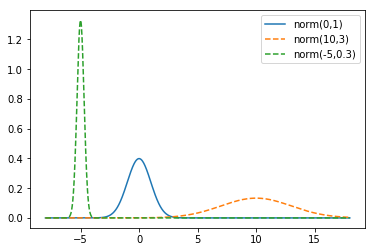

In [3]:
x=np.linspace(-8,18,1000)
plt.plot(x,G1.pdf(x),label='norm(0,1)')
plt.plot(x,G2.pdf(x),'--',label='norm(10,3)')
plt.plot(x,G3.pdf(x),'--',label='norm(-5,0.3)')
plt.legend()

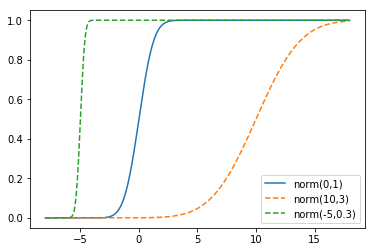

In [4]:
x=np.linspace(-8,18,1000)
plt.plot(x,G1.cdf(x),label='norm(0,1)')
plt.plot(x,G2.cdf(x),'--',label='norm(10,3)')
plt.plot(x,G3.cdf(x),'--',label='norm(-5,0.3)')
plt.legend()

In [ ]:
?stats.norm

In [7]:
def q(x):
    return stats.norm.sf(x)

In [8]:
pA=q(1)
pA

0.15865525393145707

In [9]:
pB=1-2*q(1)
pB

0.6826894921370859

In [10]:
pC=q(1)-q(2)
pC

0.13590512198327787

In [11]:
pD=q(2)-q(3)
pD

0.0214002339165491

In [12]:
pE=q(3)

Sanity check:

In [13]:
pA+pB+pC+pD+pE

1.0

In [14]:
?stats.norm

In [19]:
def qinv(x):
    return stats.norm.isf(x)

In [20]:
qinv(0.4)

0.2533471031357997

## Histograms and Density Estimation

In [21]:
# from Jake van der Plas's Python Data Science Handbook
# Make a Gaussian mixture mode (mixes Gaussians with 2 different means)
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed)
    x = rand.randn(N)
    x[int(f * N):] += 5
    return x

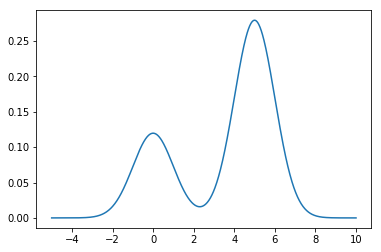

In [22]:
Ga=stats.norm()
Gb=stats.norm(5)
x=np.linspace(-5,10,1000)
plt.plot(x,0.3*Ga.pdf(x)+0.7*Gb.pdf(x))

In [23]:
X=make_data(1000)

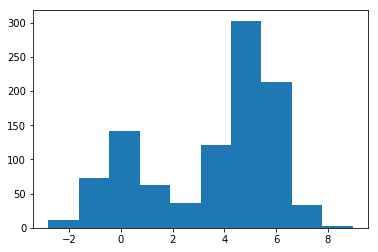

In [24]:
plt.hist(X);

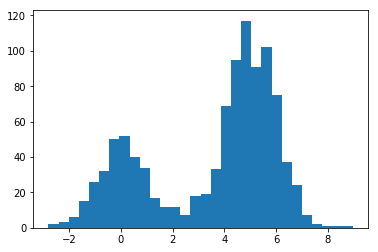

In [25]:
plt.hist(X,bins=30);

In [26]:
Y=make_data(20)

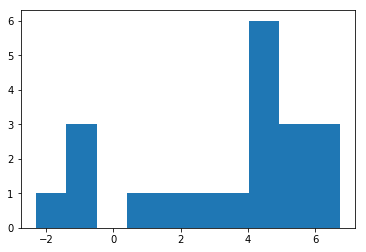

In [27]:
vals,bins,patchs=plt.hist(Y)

Let's build up something like a histogram step by step. Start by putting a block of height 1 and width 2 at each data point. 

(Since they will overlap, let's add some transparency.)

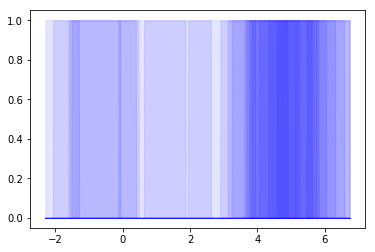

In [28]:
x = np.linspace(bins[0], bins[-1], 1000)
width=2
for xi in Y:
    block=(x>xi-width/2)&(x< xi+width/2) # Put a block of width 'width' at each data point
    plt.fill_between(x,block, color='b', alpha=0.1)

Now let's see what happens if we sum up those blocks:

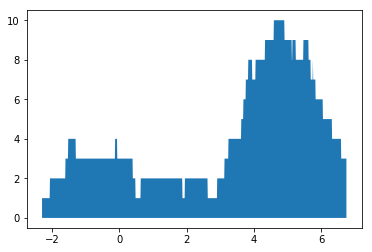

In [30]:
x = np.linspace(bins[0], bins[-1], 1000)
width=2
density=np.zeros(x.size)
for xi in Y:
    block=(x>xi-width/2)&(x< xi+width/2) # Put a block of width 'width' at each data point
#     plt.fill_between(x,block, color='b', alpha=0.1)
    density += block
plt.fill_between(x,density)

This is better, but not very smooth. There is no reason to only use rectangular blocks, so let's try a smoother shape:

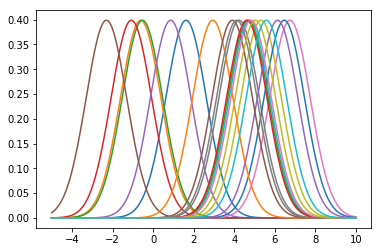

In [32]:
x = np.linspace(-5,10, 1000)
for xi in Y:
    Gi = stats.norm(xi)
    plt.plot(x,Gi.pdf(x))

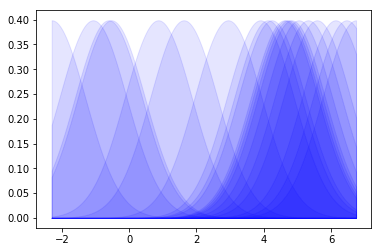

In [36]:
x = np.linspace(bins[0], bins[-1], 1000)
for xi in Y:
    Gi = stats.norm(xi)
    plt.fill_between(x,Gi.pdf(x), color='b', alpha=0.1)

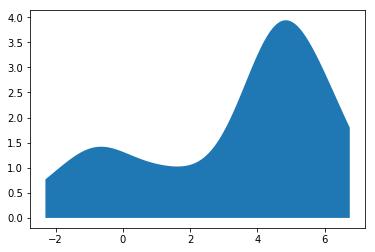

In [37]:
x = np.linspace(bins[0], bins[-1], 1000)
density=np.zeros(x.size)
for xi in Y:
    Gi = stats.norm(xi)
    density += Gi.pdf(x)
    
plt.fill_between(x,density)

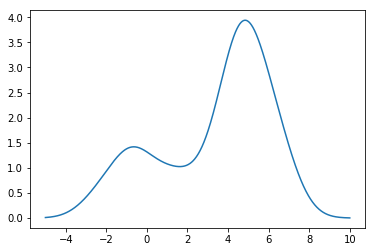

In [41]:
x = np.linspace(-5,10, 1000)
density=np.zeros(x.size)
for xi in Y:
    Gi = stats.norm(xi)
    density += Gi.pdf(x)
    
plt.plot(x,density)

The appearance will depend on the parameters of the shape that we use at each data point, called the **kernel**

This approach is called **Kernel Density Estimation** (KDE)

Here, the kernel was Gaussian. Even if we use a Gaussian, the result may still depend on the choice of variance

In [42]:
def kde(Y, variance=1):
    x = np.linspace(-5,10, 1000)
    density=np.zeros(x.size)
    for xi in Y:
        Gi = stats.norm(xi, scale=np.sqrt(variance))
        density += Gi.pdf(x)

    plt.plot(x,density)

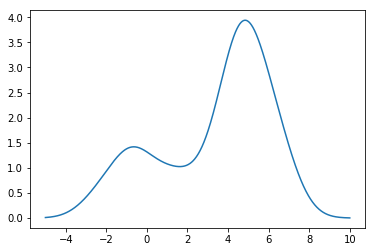

In [43]:
kde(Y)

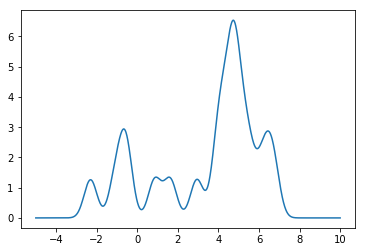

In [50]:
kde(Y, 0.1)

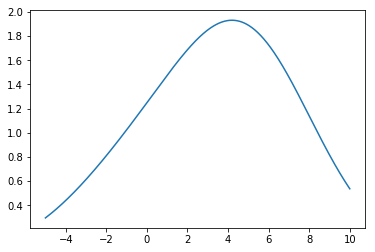

In [51]:
kde(Y, 10)

If the variance is too large, the density will be over-smoothed. If it is too small, then the data won't be smoothed enough. Fortunately, there are techniques to automatically choose the variance of the Gaussian kernel. We will generally use scipy.stat's gaussian_kde method, which uses a heuristic to choose the variance of the Gaussian kernel (called the bandwidth)


In [54]:
# what you should know
# much better way to find out what your density looks like when compared to a hsitogram

Xkde= stats.gaussian_kde(X)

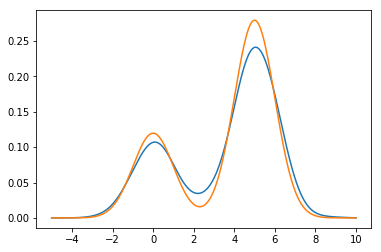

In [53]:
plt.plot(x,Xkde(x))
plt.plot(x,0.3*Ga.pdf(x)+0.7*Gb.pdf(x))

What if the data is not made from Gaussians?

In [55]:
Expon=stats.expon()

In [56]:
Y=Expon.rvs(100)

(array([37., 23., 11., 12.,  8.,  3.,  3.,  2.,  0.,  1.]),
 array([0.00884988, 0.45475249, 0.90065509, 1.3465577 , 1.7924603 ,
        2.23836291, 2.68426551, 3.13016812, 3.57607072, 4.02197333,
        4.46787594]),
 <a list of 10 Patch objects>)

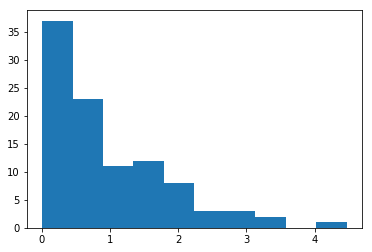

In [57]:
plt.hist(Y)

In [58]:
Ykde=stats.gaussian_kde(Y)

In [59]:
y=np.linspace(0,8,1000)

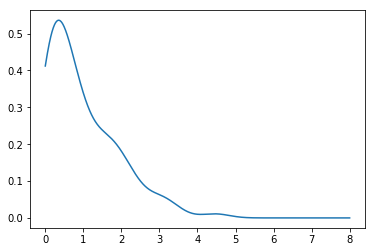

In [60]:
plt.plot(y,Ykde(y))

This is perhaps better than the histogram, but can't deal with the sudden jump in pdf values of the exponential RV:

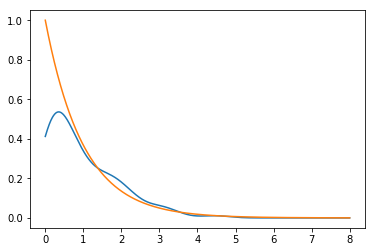

In [61]:
plt.plot(y,Ykde(y))
plt.plot (y, Expon.pdf(y))

For smoother densities, it does a better job:

In [62]:
Erl=stats.erlang(3)

In [63]:
Z=Erl.rvs(100)
Zkde=stats.gaussian_kde(Z)
z=np.linspace(0,12,1000)

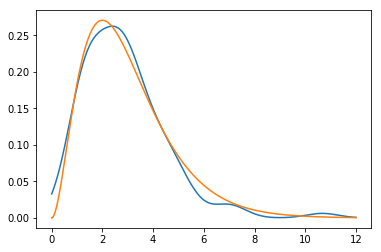

In [64]:
plt.plot(z,Zkde(z))
plt.plot (z, Erl.pdf(z))